In [60]:
!pip install -U spacy

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import spacy # contains model which we are going to use
from spacy import displacy # to display along with tag


In [62]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from PIL import Image

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from textblob import TextBlob


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
data=pd.read_csv('/content/Reviews.csv')
data

,Rating,Comments
0,5,"Very Nice Excellent Workhorse ... Durable, Hi-..."
1,5,Awesome & dependable laptop! Awesome & dependa...
2,5,Super light and efficient laptop Super light a...
3,5,NEW laptop is great so far I am loving the new...
4,5,Lightweight powerhouse. Great build quality \ ...
...,...,...
303,1,Faulty motherboard Dell sent me a laptop with ...
304,1,"Dead on arrival Laptop dead on arrival, still ..."
305,1,"Bad Quality Bad Quality, overheating, and keyb..."
306,1,Hassles with installation of Win 11 Laptop did...


In [64]:
data.shape

(308, 2)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rating    308 non-null    int64 
 1   Comments  308 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.9+ KB


In [66]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
303    False
304    False
305    False
306    False
307    False
Length: 308, dtype: bool

In [67]:
data.isnull()

,Rating,Comments
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
303,False,False
304,False,False
305,False,False
306,False,False


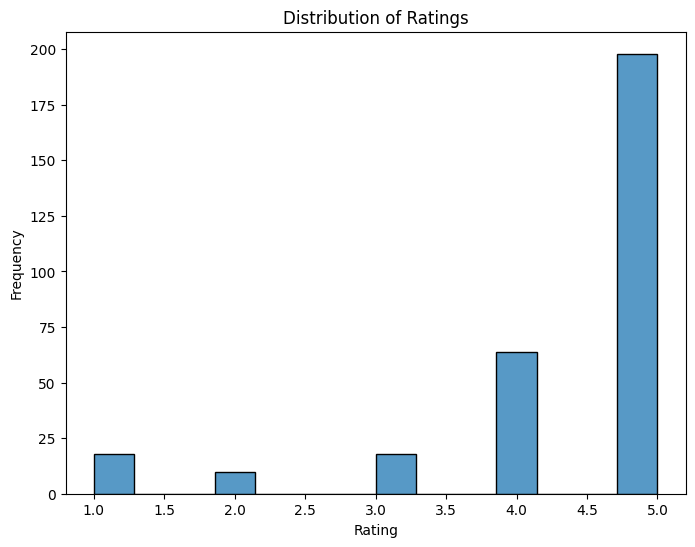

In [68]:
#  Data visualization
# Histogram of numerical variable
plt.figure(figsize=(8, 6))
sns.histplot(data['Rating'])
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [69]:
# joining all sentences of dataset
txt = ' '.join(data['Comments']) # with space join all sentences in Comments
txt

'Very Nice Excellent Workhorse ... Durable, Hi-Performance, Compact, Travels Well. Awesome & dependable laptop! Awesome & dependable laptop! Super light and efficient laptop Super light and efficient laptop. Crisp & clean screen and easier to handle. Very fast execution of apps and programs NEW laptop is great so far I am loving the new look and the feel of the new laptop Lightweight powerhouse. Great build quality \\ excellent screen \\ very good port options. Keyboard if quality and comfortable to type on the trackpad feels responsive and accurate. The weight of this laptop is outstanding perfect for the daily work commute. Great Laptop for Work Excellent laptop for work. Processor was able to handle my workload better than my current laptop. Practical Solid Laptop So far so good, I like it has an HDMI, USB-C & A ports instead of all USB-C ports. The power adapter is lighter than I was expecting. laptop is a good size and weight. Screen image looks sharp. Will be using it for work/tr

In [70]:
nlp = spacy.load('en_core_web_sm') #model name is en_core_web_sm, nlp will now have entire NER model
# en_core_web_sm is a small English pipeline trained on written web text (blogs, news, comments),
# that includes vocabulary, syntax and entities.
x = nlp(txt)
displacy.render(x,style='ent',jupyter=True)

In [71]:
for i in x:
  print(i,i.pos_) # pos - Parts of speech

Streaming output truncated to the last 5000 lines.
a DET
bit NOUN
slower ADJ
than SCONJ
I PRON
expected VERB
. PUNCT
Nice ADJ
laptop NOUN
with ADP
good ADJ
features NOUN
I PRON
have AUX
n't PART
used VERB
it PRON
for ADP
very ADV
long ADV
and CCONJ
it PRON
is AUX
replacing VERB
an DET
older ADJ
XPS13 PROPN
. PUNCT
So ADV
far ADV
it PRON
performs VERB
well ADV
and CCONJ
the DET
additional ADJ
inch NOUN
in ADP
the DET
screen NOUN
is AUX
nice ADJ
. PUNCT
Having VERB
the DET
power NOUN
button NOUN
in ADP
the DET
normal ADJ
keyboard NOUN
field NOUN
is AUX
going VERB
to PART
take VERB
some DET
time NOUN
to PART
become VERB
accustomed ADJ
to ADP
. PUNCT
I PRON
use VERB
the DET
laptop NOUN
connected VERB
to ADP
a DET
docking NOUN
station NOUN
and CCONJ
would AUX
like VERB
to PART
have VERB
USB NOUN
- PUNCT
C NOUN
ports NOUN
on ADP
both DET
sides NOUN
of ADP
the DET
laptop NOUN
. PUNCT
With ADP
them PRON
only ADV
on ADP
the DET
left NOUN
the DET
dock NOUN
cable NOUN
has VERB
to PART
run VERB
ar

In [72]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [73]:
stop = STOPWORDS

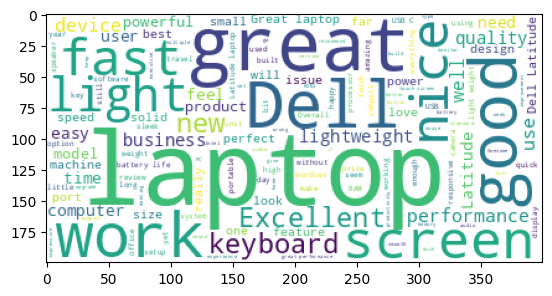

In [74]:
wc = WordCloud(background_color='white',stopwords=stop).generate(txt)
plt.imshow(wc)
# bigger the name of word more the frequency of that word in that file
# font of Dell, laptop is huge i.e. it is occuring many times in text
# word cloud is important when we are analysing the data when we build Naive bias text classification.
# This is how we can create word cloud

In [75]:
len(txt)

68272

Stemming

In [76]:
# now we can perform stemming and lemmatization
#Stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
for w in data['Comments']:
    print(w, " : ",stemmer.stem(w))

Very Nice Excellent Workhorse ... Durable, Hi-Performance, Compact, Travels Well.  :  very nice excellent workhorse ... durable, hi-performance, compact, travels well.
Awesome & dependable laptop! Awesome & dependable laptop!  :  awesome & dependable laptop! awesome & dependable laptop!
Super light and efficient laptop Super light and efficient laptop. Crisp & clean screen and easier to handle. Very fast execution of apps and programs  :  super light and efficient laptop super light and efficient laptop. crisp & clean screen and easier to handle. very fast execution of apps and program
NEW laptop is great so far I am loving the new look and the feel of the new laptop  :  new laptop is great so far i am loving the new look and the feel of the new laptop
Lightweight powerhouse. Great build quality \ excellent screen \ very good port options. Keyboard if quality and comfortable to type on the trackpad feels responsive and accurate. The weight of this laptop is outstanding perfect for the 

Lemmatization

In [77]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
##lemma = WordNetLemmatizer()
##for l in x:
  ##  print(l, " : ",lemma.lemmatize(l))

    # Extract lemmatized tokens
lemmatized_tokens = [token.lemma_ for token in x]

# Join the lemmatized tokens into a sentence
lemmatized_text = ' '.join(lemmatized_tokens)

# Print the original and lemmatized text
#print("Original Text:", data['Comments'])
print("Lemmatized Text:", lemmatized_text)

Lemmatized Text: very Nice Excellent Workhorse ... durable , Hi - Performance , Compact , travel well . Awesome & dependable laptop ! Awesome & dependable laptop ! super light and efficient laptop Super light and efficient laptop . Crisp & clean screen and easy to handle . very fast execution of app and program new laptop be great so far I be love the new look and the feel of the new laptop Lightweight powerhouse . great build quality \ excellent screen \ very good port option . Keyboard if quality and comfortable to type on the trackpad feel responsive and accurate . the weight of this laptop be outstanding perfect for the daily work commute . great laptop for Work Excellent laptop for work . Processor be able to handle my workload well than my current laptop . practical solid Laptop so far so good , I like it have an HDMI , USB - C & a port instead of all USB - c port . the power adapter be light than I be expect . laptop be a good size and weight . screen image look sharp . will be 

In [78]:
# Preprocessing

def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # Join tokens back into a string
    processed_text = ' '.join(filtered_tokens)
    return processed_text

In [79]:
# Apply preprocessing to example_text


data['Processed_Comments'] = data['Comments'].apply(preprocess_text)


In [80]:
data['Processed_Comments']

0      nice excellent workhorse durable hiperformance...
1      awesome dependable laptop awesome dependable l...
2      super light efficient laptop super light effic...
3      new laptop great far loving new look feel new ...
4      lightweight powerhouse great build quality exc...
                             ...                        
303    faulty motherboard dell sent laptop faulty mot...
304    dead arrival laptop dead arrival still waiting...
305    bad quality bad quality overheating keyboardtr...
306    hassles installation win laptop come required ...
307    broken device laptop broken customer support h...
Name: Processed_Comments, Length: 308, dtype: object

Feature Extraction using TF-IDF

In [81]:
# Feature Extraction using (Term Frequency-Inverse Document Frequency)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Processed_Comments'])

In [82]:
# Print the feature names (words)
print("Feature names:", vectorizer.get_feature_names_out())

Feature names: ['ability' 'able' 'absolutely' ... 'youre' 'zero' 'zoom']


In [83]:

# Print the TF-IDF matrix
print("TF-IDF Matrix:")
print(X.toarray())

TF-IDF Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# <font color='a34668'> <b> <span style="text-decoration: underline;">Sentiment Analysis</span> </b> </font>

Textblob

In [84]:
def get_sentiment_assessments(txt):
    return TextBlob(txt).sentiment_assessments

def get_polarity(txt):
    return TextBlob(txt).sentiment.polarity

def get_subjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

print ('Sentiment Assessments: ', get_sentiment_assessments('This is a pleasant place'))
print ('Polarity: ',get_polarity('This is a pleasant place'))
print ('Subjectivity: ',get_subjectivity('This is a pleasant place'))

Sentiment Assessments:  Sentiment(polarity=0.7333333333333333, subjectivity=0.9666666666666667, assessments=[(['pleasant'], 0.7333333333333333, 0.9666666666666667, None)])
Polarity:  0.7333333333333333
Subjectivity:  0.9666666666666667


In [85]:
data['tb_polarity'] = data['Comments'].apply(get_polarity)

Distribution of polarities using a histogram

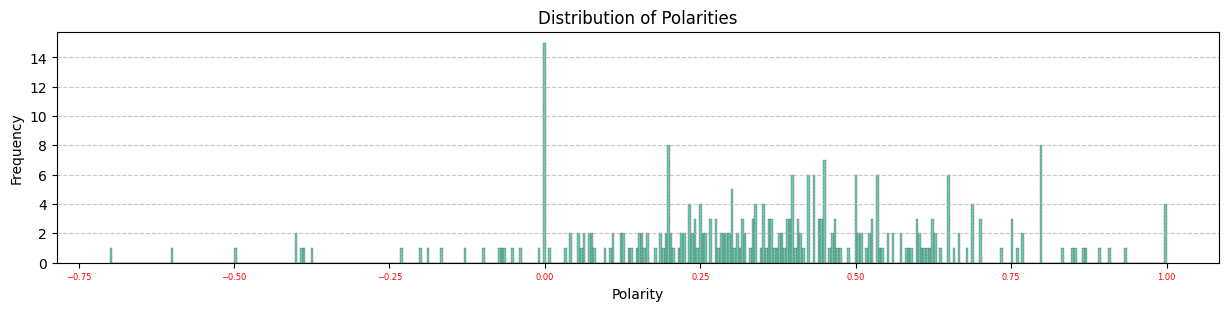

In [86]:
# Distribution of polarities using a histogram
plt.figure(figsize=(15, 3))
sns.histplot(data['tb_polarity'], bins=400, kde=False, color='#45b397', linestyle='--')
plt.title('Distribution of Polarities')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
# plt.xticks(ticks=[10], labels=['1'], fontname='Arial', fontsize=6)
plt.tick_params(axis='x', labelsize=6, labelcolor='red')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [87]:
data.head()

,Rating,Comments,Processed_Comments,tb_polarity
0,5,"Very Nice Excellent Workhorse ... Durable, Hi-...",nice excellent workhorse durable hiperformance...,0.890000
1,5,Awesome & dependable laptop! Awesome & dependa...,awesome dependable laptop awesome dependable l...,1.000000
2,5,Super light and efficient laptop Super light a...,super light efficient laptop super light effic...,0.334762
3,5,NEW laptop is great so far I am loving the new...,new laptop great far loving new look feel new ...,0.318182
4,5,Lightweight powerhouse. Great build quality \ ...,lightweight powerhouse great build quality exc...,0.626250



Distribution of Sentiment

In [88]:
#We will calculate a 'sentiment_score' as product of 'tb_polarity' and 'Rating'
import numpy as np

data['Rating'] =pd.to_numeric(data['Rating'],errors='coerce')

data['sentiment_score_tb'] = data['tb_polarity'] * data['Rating']

##### <font color='#938688'> <i> We will assign a 'sentiment' category based on the calculated 'sentiment_score' </i> </font>
<font color='#938688' face='Courier New'>
<ul>
    <li>-5.00 to -3.00 => V. Negative</li>
    <li>-3.00 to -0.75 => Negative</li>
    <li>-0.75 to 0.75 => Neutral</li>
    <li>0.75 to 4.25 => Positive</li>
    <li>4.25 to 5.00 => V. Positive</li>
</ul>
</font>

In [89]:
data['sentiment_tb'] = data['sentiment_score_tb'].apply(lambda sentiment_score: 'V. Negative'
                                                           if sentiment_score<-3
                                                           else ( 'Negative' if sentiment_score < -0.75
                                                                 else ( 'Neutral' if sentiment_score<0.75
                                                                       else ( 'Positive' if sentiment_score< 4.25 else 'V. Positive'))))

In [90]:
data.head()

,Rating,Comments,Processed_Comments,tb_polarity,sentiment_score_tb,sentiment_tb
0,5,"Very Nice Excellent Workhorse ... Durable, Hi-...",nice excellent workhorse durable hiperformance...,0.890000,4.450000,V. Positive
1,5,Awesome & dependable laptop! Awesome & dependa...,awesome dependable laptop awesome dependable l...,1.000000,5.000000,V. Positive
2,5,Super light and efficient laptop Super light a...,super light efficient laptop super light effic...,0.334762,1.673810,Positive
3,5,NEW laptop is great so far I am loving the new...,new laptop great far loving new look feel new ...,0.318182,1.590909,Positive
4,5,Lightweight powerhouse. Great build quality \ ...,lightweight powerhouse great build quality exc...,0.626250,3.131250,Positive


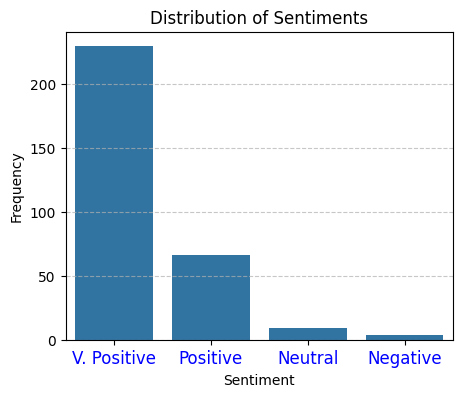

In [91]:
plt.figure(figsize=(5, 4))
freq = data['sentiment_tb'].value_counts()
sns.barplot(x=data['sentiment_tb'].unique(), y=freq)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.tick_params(axis='x', labelsize=12, labelcolor='blue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## <font color='b35678'> <b> Pre-trained Vader Lexicon </b> </font>

In [92]:
#Populate the compound scores for each review

In [93]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [94]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment_intensity_analyzer = SentimentIntensityAnalyzer()
def get_compound_score(text):
    return sentiment_intensity_analyzer.polarity_scores(text)['compound']

print('1) Sentiment for \'This is a fantastic place. Don\'t miss this for anything !\': ',
     sentiment_intensity_analyzer.polarity_scores('This is a fantastic place. Don\'t miss this for anything !'))
print('2) Sentiment for \'This is a fantastic place. Should be on your bucket list !\': ',
     sentiment_intensity_analyzer.polarity_scores('This is a fantastic place. Should be on your bucket list !'))


1) Sentiment for 'This is a fantastic place. Don't miss this for anything !':  {'neg': 0.0, 'neu': 0.567, 'pos': 0.433, 'compound': 0.6526}
2) Sentiment for 'This is a fantastic place. Should be on your bucket list !':  {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.5983}


In [95]:
data['compound_score'] = data['Comments'].apply(lambda Comments: get_compound_score(Comments))
data.head()

,Rating,Comments,Processed_Comments,tb_polarity,sentiment_score_tb,sentiment_tb,compound_score
0,5,"Very Nice Excellent Workhorse ... Durable, Hi-...",nice excellent workhorse durable hiperformance...,0.890000,4.450000,V. Positive,0.8470
1,5,Awesome & dependable laptop! Awesome & dependa...,awesome dependable laptop awesome dependable l...,1.000000,5.000000,V. Positive,0.8684
2,5,Super light and efficient laptop Super light a...,super light efficient laptop super light effic...,0.334762,1.673810,Positive,0.9578
3,5,NEW laptop is great so far I am loving the new...,new laptop great far loving new look feel new ...,0.318182,1.590909,Positive,0.8505
4,5,Lightweight powerhouse. Great build quality \ ...,lightweight powerhouse great build quality exc...,0.626250,3.131250,Positive,0.9764


# We will assign a 'sentiment' category based on the calculated 'compound_score'

-1.00 to -0.60 => V. Negative

-0.60 to -0.15 => Negative

-0.15 to 0.15 => Neutral

0.15 to 0.85 => Positive

0.85 to 1.00 => V. Positive

In [96]:
data['sentiment_vader'] = data['compound_score'].apply(lambda compound_score: 'V. Negative'
                                                           if compound_score<-0.6
                                                           else ( 'Negative' if compound_score < -0.15
                                                                 else ( 'Neutral' if compound_score<0.15
                                                                       else ( 'Positive' if compound_score< 0.85 else 'V. Positive'))))
data.head()


,Rating,Comments,Processed_Comments,tb_polarity,sentiment_score_tb,sentiment_tb,compound_score,sentiment_vader
0,5,"Very Nice Excellent Workhorse ... Durable, Hi-...",nice excellent workhorse durable hiperformance...,0.890000,4.450000,V. Positive,0.8470,Positive
1,5,Awesome & dependable laptop! Awesome & dependa...,awesome dependable laptop awesome dependable l...,1.000000,5.000000,V. Positive,0.8684,V. Positive
2,5,Super light and efficient laptop Super light a...,super light efficient laptop super light effic...,0.334762,1.673810,Positive,0.9578,V. Positive
3,5,NEW laptop is great so far I am loving the new...,new laptop great far loving new look feel new ...,0.318182,1.590909,Positive,0.8505,V. Positive
4,5,Lightweight powerhouse. Great build quality \ ...,lightweight powerhouse great build quality exc...,0.626250,3.131250,Positive,0.9764,V. Positive


In [97]:
data['sentiment_vader'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Positive       45.1%
V. Positive    39.6%
Neutral         6.8%
V. Negative     4.5%
Negative        3.9%
Name: sentiment_vader, dtype: object

<ipython-input-98-513146566538>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['compound_score'], bins=100, color='#b34728', hist_kws={'edgecolor': '#a33718'})


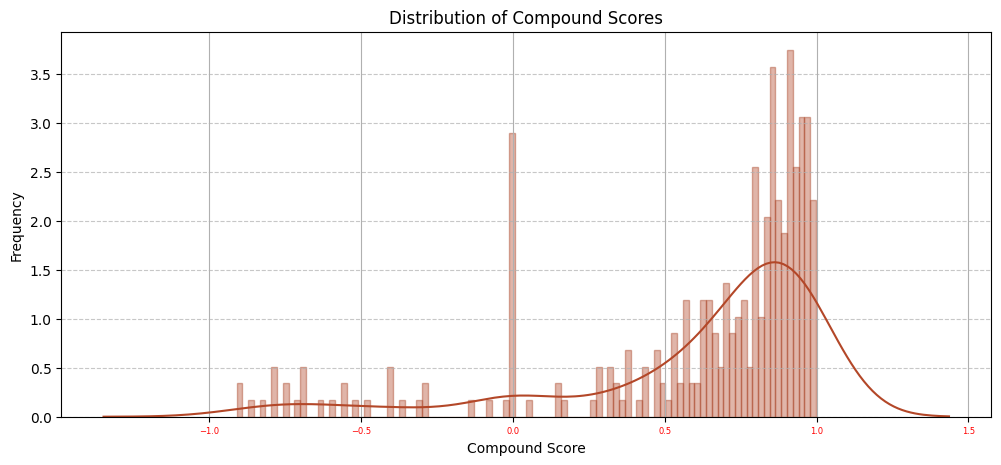

In [98]:
# Distribution of polarities using a histogram
plt.figure(figsize=(12, 5))
# sns.histplot(df['tb_polarity'], bins=400, kde=False, color='#45b397', linestyle='--')
sns.distplot(data['compound_score'], bins=100, color='#b34728', hist_kws={'edgecolor': '#a33718'})
plt.title('Distribution of Compound Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
# plt.xticks(ticks=[10], labels=['1'], fontname='Arial', fontsize=6)
plt.tick_params(axis='x', labelsize=6, labelcolor='red')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(True)
plt.show()

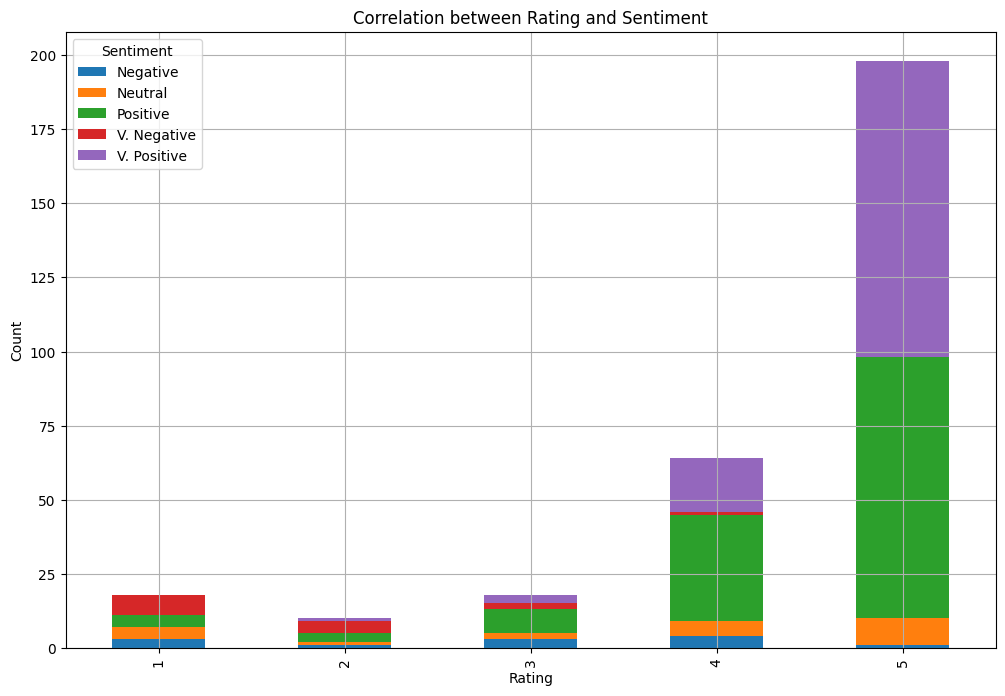

In [99]:
# Group by 'Rating' and 'Sentiment' and count occurrences
grouped_data = data.groupby(['Rating', 'sentiment_vader']).size().unstack()

# Plotting the grouped bar chart
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Correlation between Rating and Sentiment')
plt.legend(title='Sentiment')
plt.grid(True)
plt.show()

In [100]:
df1 = data[['tb_polarity','compound_score']].copy()
print(id(df1), id(data))
df1.head()

133865487902048 133865515719344


,tb_polarity,compound_score
0,0.890000,0.8470
1,1.000000,0.8684
2,0.334762,0.9578
3,0.318182,0.8505
4,0.626250,0.9764


In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1=pd.DataFrame(scaler.fit_transform(df1), columns=['tb_polarity','compound_score'])
df1.head()

,tb_polarity,compound_score
0,0.935294,0.920751
1,1.000000,0.931967
2,0.608683,0.978825
3,0.598930,0.922585
4,0.780147,0.988574


Sentiment Correlation Analysis

Normalize User Ratings

In [102]:
# user_ratings = data['Rating']
# normalized_ratings = [(rating - min(user_ratings)) / (max(user_ratings) - min(user_ratings)) * 2 - 1 for rating in user_ratings]

scaler = MinMaxScaler()

df1['normalized_rating'] = scaler.fit_transform(data[['Rating']])

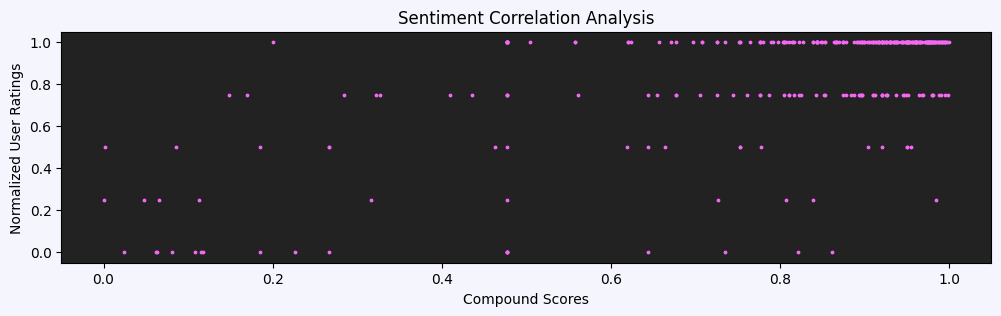

In [103]:
plt.figure(figsize=(12,3))
plt.gcf().set_facecolor('#f5f5fe')
plt.scatter(df1['compound_score'],df1['normalized_rating'], s=3, c='#f467f3').axes.set_facecolor('#222222')
plt.xlabel('Compound Scores')
plt.ylabel('Normalized User Ratings')
plt.title('Sentiment Correlation Analysis')
plt.show()

# Split data into training and testing sets

In [104]:
data.head()

,Rating,Comments,Processed_Comments,tb_polarity,sentiment_score_tb,sentiment_tb,compound_score,sentiment_vader
0,5,"Very Nice Excellent Workhorse ... Durable, Hi-...",nice excellent workhorse durable hiperformance...,0.890000,4.450000,V. Positive,0.8470,Positive
1,5,Awesome & dependable laptop! Awesome & dependa...,awesome dependable laptop awesome dependable l...,1.000000,5.000000,V. Positive,0.8684,V. Positive
2,5,Super light and efficient laptop Super light a...,super light efficient laptop super light effic...,0.334762,1.673810,Positive,0.9578,V. Positive
3,5,NEW laptop is great so far I am loving the new...,new laptop great far loving new look feel new ...,0.318182,1.590909,Positive,0.8505,V. Positive
4,5,Lightweight powerhouse. Great build quality \ ...,lightweight powerhouse great build quality exc...,0.626250,3.131250,Positive,0.9764,V. Positive


In [105]:
X = data['Processed_Comments']
y = data['Rating']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [107]:
len(X_train),len( X_test), len(y_train), len(y_test)

(246, 62, 246, 62)

**# Building Model**

In [108]:
# Vectorize comments using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


# **Support Vector Machines (SVM) Model**

In [109]:
# Initialize and train SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [110]:
# Predict on test set
y_pred = svm_classifier.predict(X_test_tfidf)
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6612903225806451


# **Naive Bayes Model**

In [111]:
# Vectorize comments using Bag-of-Words
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [112]:
# Initialize and train Naive Bayes classifier
nb_classifier = MultinomialNB()
X_train_nb = nb_classifier.fit(X_train_bow, y_train)

In [113]:
# Predict on test set
y_pred_nb = nb_classifier.predict(X_test_bow)

In [114]:
# Evaluate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy:",accuracy_nb)

Accuracy: 0.6290322580645161


# **Logistic Regression Model**

In [120]:
# Training the Logistic Regression model
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_tfidf, y_train)
y_pred_lr = logistic_regression.predict(X_test_tfidf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

Logistic Regression Accuracy: 0.6774193548387096


## **Random Forest Model**

In [121]:
# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train_tfidf, y_train)
y_pred_rf = random_forest.predict(X_test_tfidf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.6774193548387096


# **Decision Tree**

In [122]:
model_dt_gini=DecisionTreeClassifier(criterion="gini",max_depth=3)
model_dt_gini.fit(X_train_tfidf,y_train)
y_pred_dt_gini=model_dt_gini.predict(X_test_tfidf)
accuracy_dt = accuracy_score(y_test, y_pred_dt_gini)
print("\nRandom Forest Accuracy:", accuracy_dt)


Random Forest Accuracy: 0.6774193548387096


In [127]:
y_prob=logistic_regression.predict_proba(X_test_tfidf)[:,1]
y_prob

array([0.02895647, 0.01635085, 0.01845268, 0.01942006, 0.01349677,
       0.02482196, 0.0190389 , 0.02865672, 0.03216716, 0.02271043,
       0.02532361, 0.01672996, 0.02869715, 0.04242546, 0.03169058,
       0.02791857, 0.01696905, 0.0168373 , 0.01321766, 0.02584763,
       0.01354298, 0.02753953, 0.02271316, 0.02262826, 0.02992258,
       0.01939396, 0.02305378, 0.0142345 , 0.04253309, 0.02457455,
       0.03419745, 0.02028427, 0.0227111 , 0.02482551, 0.0185659 ,
       0.01859523, 0.01982745, 0.02206937, 0.02692165, 0.02775221,
       0.02452599, 0.02535224, 0.01930433, 0.02042718, 0.03164449,
       0.02090056, 0.02258446, 0.0196464 , 0.03720287, 0.01223842,
       0.02009318, 0.02739226, 0.01609417, 0.0254049 , 0.02298043,
       0.01965627, 0.03613221, 0.02163212, 0.02342399, 0.02038327,
       0.02653444, 0.01382711])

# **Combined accuracies of all models**

In [128]:
values={'SVC': accuracy,'NB':accuracy_nb,'LR':accuracy_lr,'RF':accuracy_rf,'DT':accuracy_dt}
values

{'SVC': 0.6612903225806451,
 'NB': 0.6290322580645161,
 'LR': 0.6774193548387096,
 'RF': 0.6774193548387096,
 'DT': 0.6774193548387096}

In [129]:
import pickle
from pickle import load
from pickle import dump

#save the model to disk
logistic_regression= 'lre.sav'
dump(logistic_regression,open('logistic_regression.pkl','wb'))